<a href="https://colab.research.google.com/github/viviennejuma/ProjectRainMakers/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PROBLEM STATEMENT
Predicting whether rain today and rain tomorrow are correlated or dependent.

# HYPOTHESIS
The claim is that the rain today and tomorrow are dependent with each other

# METRIC FOR SUCCESS
This project will be successful when we identify whether rain today and tomorrow are dependent.

# Understanding the context
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.
RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.

#Recording the Experimental Design
Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

Challenge your solution by providing insights on how you can make improvements. Defining the research question

# Relevance of the data
THe data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and location, factors affecting rainfall and whether it rain today or tomorrow. The dataset used was ranging from 2007 to 2017 and is relevant for this analysis

In [ ]:
# Importing necessary libraries
#For df_no loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Reading our data
df=pd.read_csv("weatherAUS.csv")

# Checking the data

In [ ]:
#previewing our data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# checking the shape of our data
df.shape

(145460, 23)

In [ ]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# checking for duplicates
df.duplicated().any()

False

In [ ]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df=pd.read_csv("weatherAUS.csv", parse_dates=['Date'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df['Date'].min()

Timestamp('2007-11-01 00:00:00')

In [ ]:
df['Date'].max()

Timestamp('2017-06-25 00:00:00')

In [ ]:
# checking for missing values
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


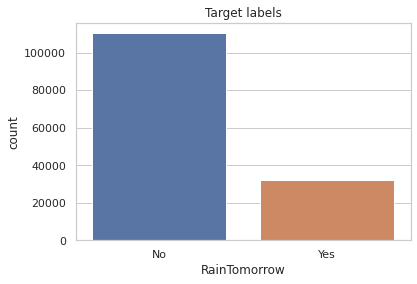

In [ ]:
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

From above plot it is clear that data set is imbalanced

In [ ]:

#Separating the df_no based on its class label.
df_yes = df[df['RainTomorrow']=='Yes']
df_no = df[df['RainTomorrow']=='No']

Now lets observe the most occuring values in every column for both the cases

In [ ]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = df_yes.mode()
mode_values_for_yes.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,W,9.0,17.0,99.0,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No,Yes


In [ ]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = df_no.mode()
mode_values_for_no.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2014-03-18,Canberra,11.0,20.0,0.0,4.0,11.0,E,35.0,N,SE,9.0,13.0,65.0,52.0,1017.9,1015.5,1.0,1.0,16.0,20.0,No,No


In [ ]:
df_no['MaxTemp'].median()

23.3

In [ ]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
df_yes['MinTemp'].fillna(value=df_yes['MinTemp'].mode()[0],inplace=True )
df_no['MinTemp'].fillna(value=df_no['MinTemp'].mode()[0],inplace=True )

df_yes['MaxTemp'].fillna(value=df_yes['MaxTemp'].mode()[0],inplace=True )
df_no['MaxTemp'].fillna(value=df_no['MaxTemp'].mode()[0],inplace=True )


df_yes['Temp9am'].fillna(value=df_yes['Temp9am'].mode()[0],inplace=True )
df_no['Temp9am'].fillna(value=df_no['Temp9am'].mode()[0],inplace=True )

df_yes['Temp3pm'].fillna(value=df_yes['Temp3pm'].mode()[0],inplace=True )
df_no['Temp3pm'].fillna(value=df_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
df_yes['Humidity9am'].fillna(value=df_yes['Humidity9am'].mode()[0],inplace=True )
df_no['Humidity9am'].fillna(value=df_no['Humidity9am'].mode()[0],inplace=True )



df_yes['Humidity3pm'].fillna(value=df_yes['Humidity3pm'].mode()[0],inplace=True )
df_no['Humidity3pm'].fillna(value=df_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
df_yes['Rainfall'].fillna(value=0.0,inplace=True)
df_no['Rainfall'].fillna(value=0.0,inplace=True)

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
df_yes['Rainfall'].fillna(value=0.0,inplace=True)
df_no['Rainfall'].fillna(value=0.0,inplace=True)


df_yes['Pressure9am'].fillna(value=df_yes['Pressure9am'].median(),inplace=True )
df_no['Pressure9am'].fillna(value=df_no['Pressure9am'].median(),inplace=True )

df_yes['Pressure3pm'].fillna(value=df_yes['Pressure3pm'].median(),inplace=True )
df_no['Pressure3pm'].fillna(value=df_no['Pressure3pm'].median(),inplace=True )


df_yes['WindSpeed9am'].fillna(value=df_yes['WindSpeed9am'].median(),inplace=True )
df_no['WindSpeed9am'].fillna(value=df_no['WindSpeed9am'].median(),inplace=True )

df_yes['WindSpeed3pm'].fillna(value=df_yes['WindSpeed3pm'].median(),inplace=True )
df_no['WindSpeed3pm'].fillna(value=df_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
df_yes['WindGustSpeed'].fillna(value=df_yes['WindGustSpeed'].median(),inplace=True)
df_no['WindGustSpeed'].fillna(value=df_no['WindGustSpeed'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
df_yes.dropna(inplace=True)
df_no.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_filled= df_yes.append(df_no, ignore_index=True)

In [ ]:
#checking missing values
df_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [ ]:
# checking the uniques
df_filled.nunique()

Date             3416
Location           26
MinTemp           351
MaxTemp           395
Rainfall          410
Evaporation       259
Sunshine          145
WindGustDir        16
WindGustSpeed      61
WindDir9am         16
WindDir3pm         16
WindSpeed9am       36
WindSpeed3pm       37
Humidity9am       101
Humidity3pm       101
Pressure9am       504
Pressure3pm       507
Cloud9am            9
Cloud3pm           10
Temp9am           383
Temp3pm           393
RainToday           2
RainTomorrow        2
dtype: int64

# Exploratory Data Analysis

In [ ]:
# Rename columns

#col_names = df_filled.columns.tolist()
#for col in range(len(col_names)):
 # col_names[col] = col_names[col].lower().replace(" ", "_")

#df_filled.columns = col_names

In [ ]:
# standardizing the column names uniform.

df_filled.columns = df_filled.columns.str.replace('_', '').str.strip().str.lower()  # Dealing with the inconsistencies

df_filled.columns      # Displaying column names

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [ ]:
# previewing the columns
df_filled.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [ ]:
# checking the shape of the new data
df_filled.shape

(56669, 23)

In [ ]:
df_filled.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2009-01-19,Cobar,21.4,37.5,0.0,14.8,6.9,NNE,43.0,ENE,NNE,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,No,Yes
1,2009-01-22,Cobar,21.8,30.7,0.0,8.0,5.9,WNW,56.0,N,N,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,No,Yes
2,2009-01-23,Cobar,20.3,36.0,18.0,8.2,10.5,WSW,94.0,NNE,NW,13.0,7.0,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,Yes,Yes
3,2009-02-03,Cobar,23.6,40.4,0.6,11.8,12.2,WSW,54.0,E,SSW,9.0,11.0,42.0,17.0,1008.4,1005.0,1.0,2.0,29.9,38.7,No,Yes
4,2009-02-13,Cobar,16.8,23.3,0.6,8.0,2.3,E,63.0,E,E,35.0,35.0,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4,No,Yes


In [ ]:
#checcking the numerical and categorical variables
numerical = df_filled._get_numeric_data().columns
categorical = set(df_filled.columns) - set(numerical)

In [ ]:
numerical

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm'],
      dtype='object')

In [ ]:
categorical

{'date',
 'location',
 'raintoday',
 'raintomorrow',
 'winddir3pm',
 'winddir9am',
 'windgustdir'}

In [ ]:
# Get average of columns
def mean(col1, col2, colname):
  col = df_filled.loc[: , col1:col2]
  df_filled[colname] = col.mean(axis=1)

In [ ]:
mean("windspeed9am", "windspeed3pm", "avg_windspeed")
mean('humidity9am', 'humidity3pm', 'avg_humidity')
mean('pressure9am', 'pressure3pm', 'avg_pressure')
mean('cloud9am', 'cloud3pm', 'avg_cloud')
mean('mintemp', 'maxtemp', 'avg_temp')
mean('temp9am', 'temp3pm', 'avg_temp')

In [ ]:
df_filled.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,avg_windspeed,avg_humidity,avg_pressure,avg_cloud,avg_temp
0,2009-01-19,Cobar,21.4,37.5,0.0,14.8,6.9,NNE,43.0,ENE,NNE,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,No,Yes,17.5,31.5,1011.35,6.5,30.15
1,2009-01-22,Cobar,21.8,30.7,0.0,8.0,5.9,WNW,56.0,N,N,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,No,Yes,21.5,67.0,1007.40,7.0,25.85
2,2009-01-23,Cobar,20.3,36.0,18.0,8.2,10.5,WSW,94.0,NNE,NW,13.0,7.0,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,Yes,Yes,10.0,69.5,1007.65,5.5,29.05
3,2009-02-03,Cobar,23.6,40.4,0.6,11.8,12.2,WSW,54.0,E,SSW,9.0,11.0,42.0,17.0,1008.4,1005.0,1.0,2.0,29.9,38.7,No,Yes,10.0,29.5,1006.70,1.5,34.30
4,2009-02-13,Cobar,16.8,23.3,0.6,8.0,2.3,E,63.0,E,E,35.0,35.0,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4,No,Yes,35.0,59.5,1013.00,7.0,20.45


#Univariate analysis

* Categorical variables

In [ ]:
df_filled['raintomorrow'].value_counts()

No     44168
Yes    12501
Name: raintomorrow, dtype: int64

In [ ]:
df_filled['raintomorrow'].value_counts()/len(df)

No     0.303644
Yes    0.085941
Name: raintomorrow, dtype: float64

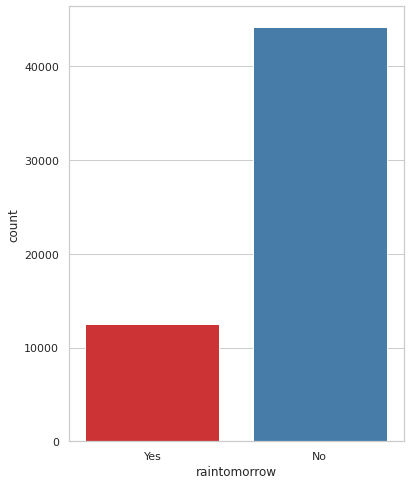

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="raintomorrow", data=df_filled, palette="Set1")
plt.show()

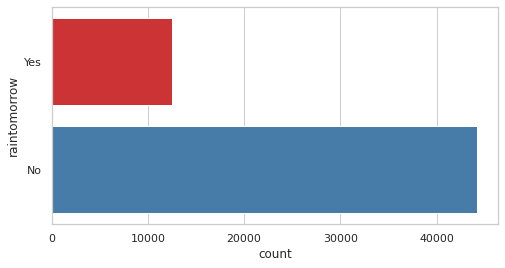

In [ ]:
#PLOTTING HORIZONTALLY
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="raintomorrow", data=df_filled, palette="Set1")
plt.show()


The number of unique values in RainTomorrow and RainToday variable is 2.

The two unique values are No and Yes.

Out of the total number of RainTomorrow values, No appears 28% times and Yes appears 3% times.

The univariate plot confirms our findings that –

The No variable have 24654 entries, and

The Yes variable have 7430 entries.



* Numerical Variables


##### Measures of central tendency

In [ ]:
#  Mean, mode and median for taken MinTemp 
print('The mean for mintemp', df_filled.mintemp.mean())
print('The median mintemp',df_filled.mintemp.median())
print('The mode for mintemp ', df_filled.mintemp.mode())
print('The std for mintemp ', df_filled.mintemp.std())

The mean for mintemp 13.455949460904407
The median mintemp 13.2
The mode for mintemp  0    13.0
dtype: float64
The std for mintemp  6.415744692366765


In [ ]:
#  Mean, mode and median for taken MAXTEMP 
print('The mean for maxtemp', df_filled.maxtemp.mean())
print('The median maxtemp',df_filled.maxtemp.median())
print('The mode for maxtemp ', df_filled.maxtemp.mode())
print('The std for maxtemp ', df_filled.maxtemp.std())

The mean for maxtemp 24.208424358996904
The median maxtemp 23.9
The mode for maxtemp  0    19.6
dtype: float64
The std for maxtemp  6.973225142583974


#####Checking outliers in numerical columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

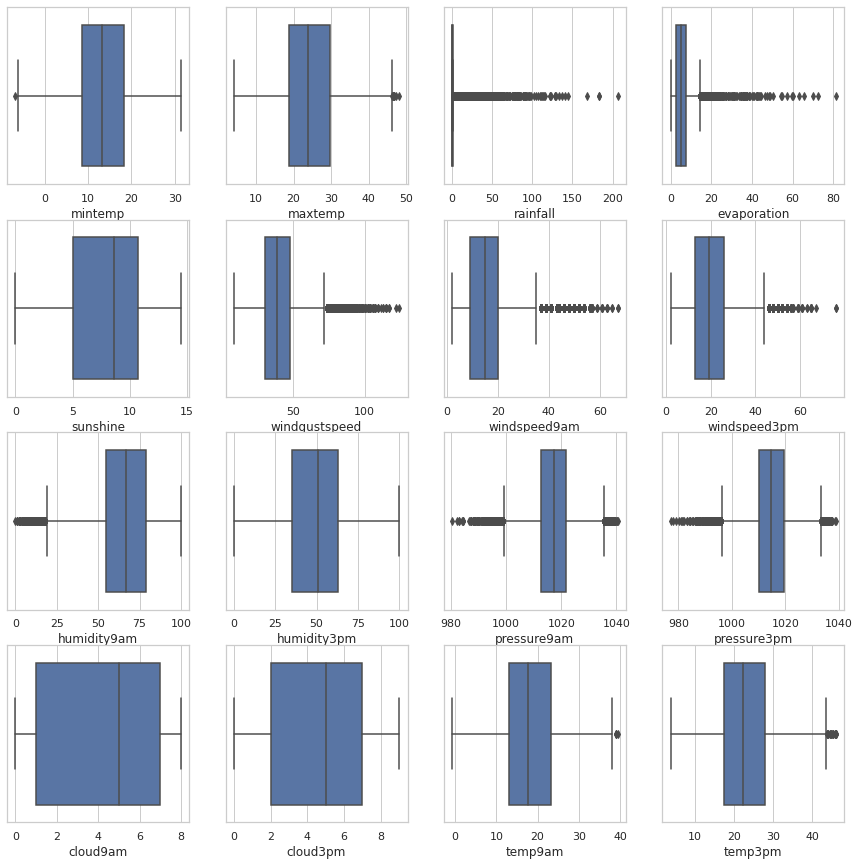

In [ ]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df_filled[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

* Removing outliers in the numerical columns

In [ ]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df_filled[numerical[i]].quantile(0.25)
        q3 = df_filled[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df_filled.loc[(df_filled[numerical[i]] <= minimum), numerical[i]] = minimum
        df_filled.loc[(df_filled[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

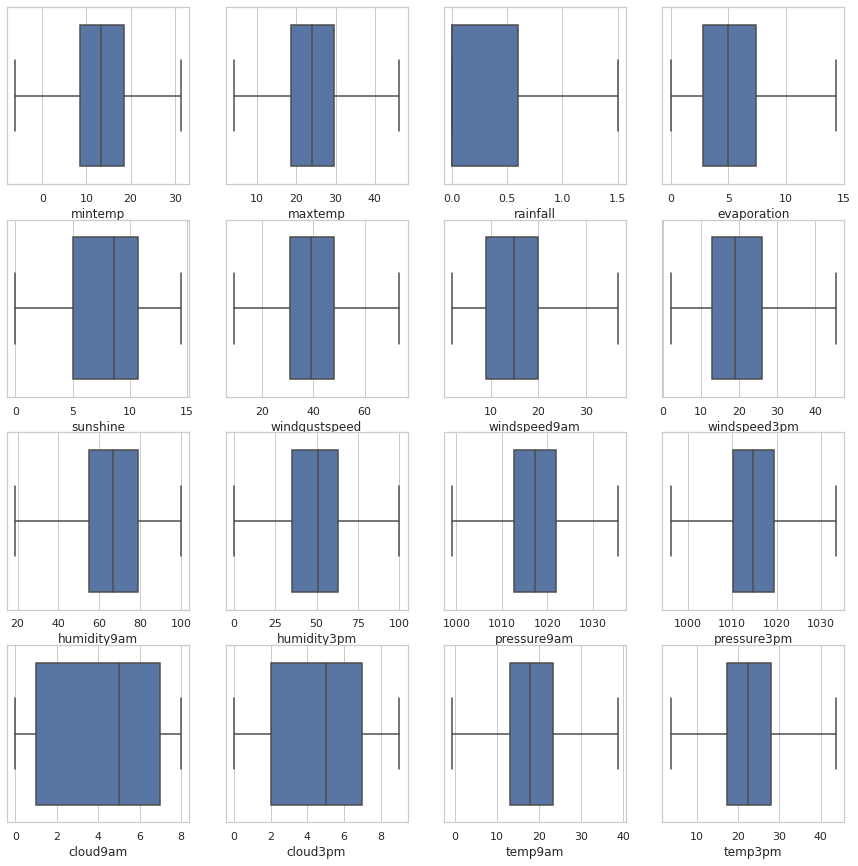

In [ ]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df_filled[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

* Distribution of the numerical columns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

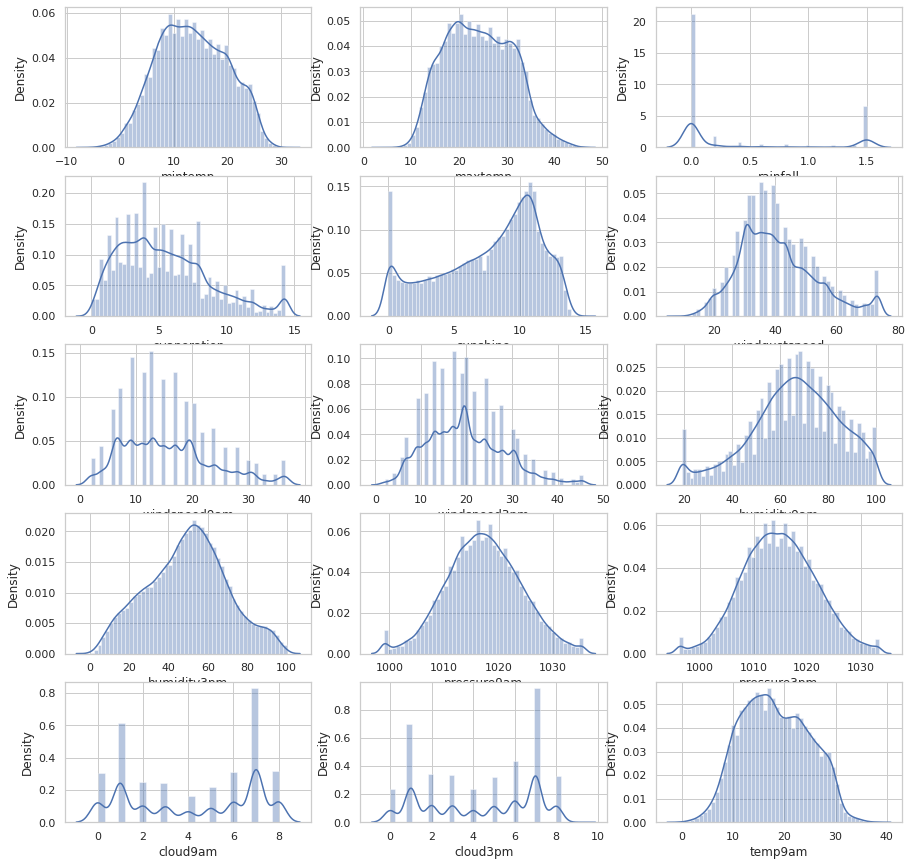

In [ ]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df_filled[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1;
    plt.savefig('distribution_after_removing_outliers_from_numerical_columns.png')
    plt.show()
plotHist()

# Bivariate Analysis and Mulitivariate Analysis

In [ ]:
# using select columns into a separate frame for bivariate analysis

selected_columns= df_filled[['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'raintoday', 'raintomorrow', 'avg_windspeed', 'avg_humidity',
       'avg_pressure', 'avg_cloud', 'avg_temp']]

df_biv=selected_columns.copy()

The temperatures taken at different times are correlated with each other

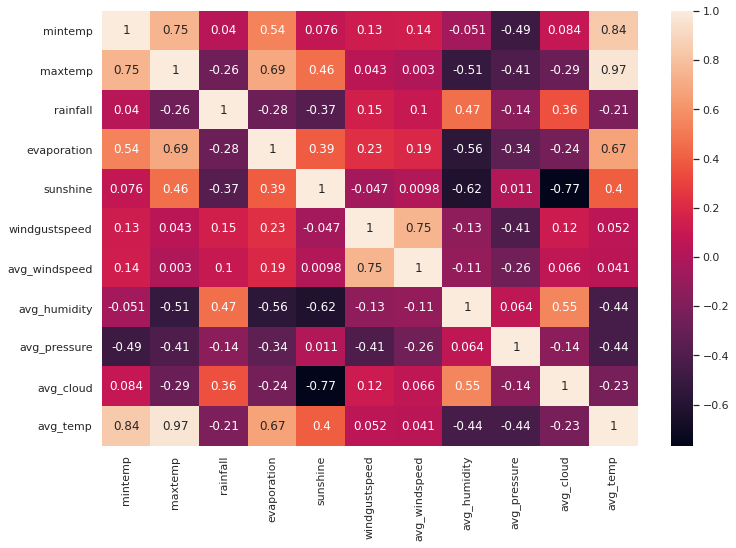

In [ ]:

# Heat map showing correlation

plt.figure(figsize=(12, 8))

dfcorr = df_biv.corr()
sns.heatmap(dfcorr, 
            xticklabels = dfcorr.columns.values,
            yticklabels = dfcorr.columns.values,
            annot = True);

In [ ]:
df_biv['year']=df_biv['date'].dt.year

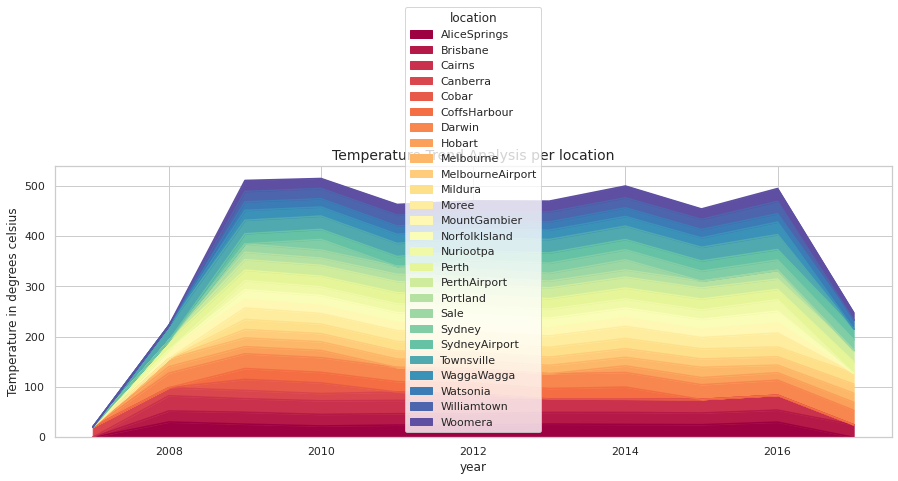

In [ ]:
# Area chart showing minimum temperature in Australia by Location over the years

by_year = (df_biv.groupby(['year', 'location']).avg_temp.mean())
by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(15, 5))
plt.ylabel('Temperature in degrees celsius')
plt.title('Temperature Trend Analysis per location', fontsize=14)
plt.show()

The data shows a general increase in temperature in 2016, 2014 and 2010. Brisbane and Cairns seems to be consistent temperature-wise. The temperature between 2011 and 2013 is steady.

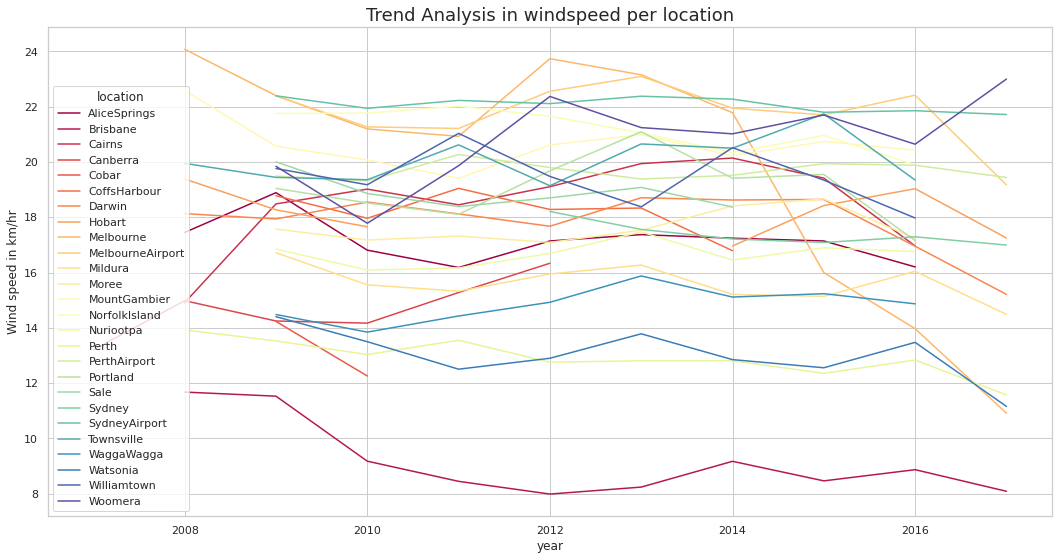

In [ ]:
# Line graph showing evolution of temperature over the years in different locations

by_year = (df_biv.groupby(['year', 'location']).avg_windspeed.mean())
by_year.unstack().plot(kind='line', colormap= 'Spectral', figsize=(18, 9))
plt.ylabel('Wind speed in km/hr')
plt.title('Trend Analysis in windspeed per location', fontsize=18)
plt.show()


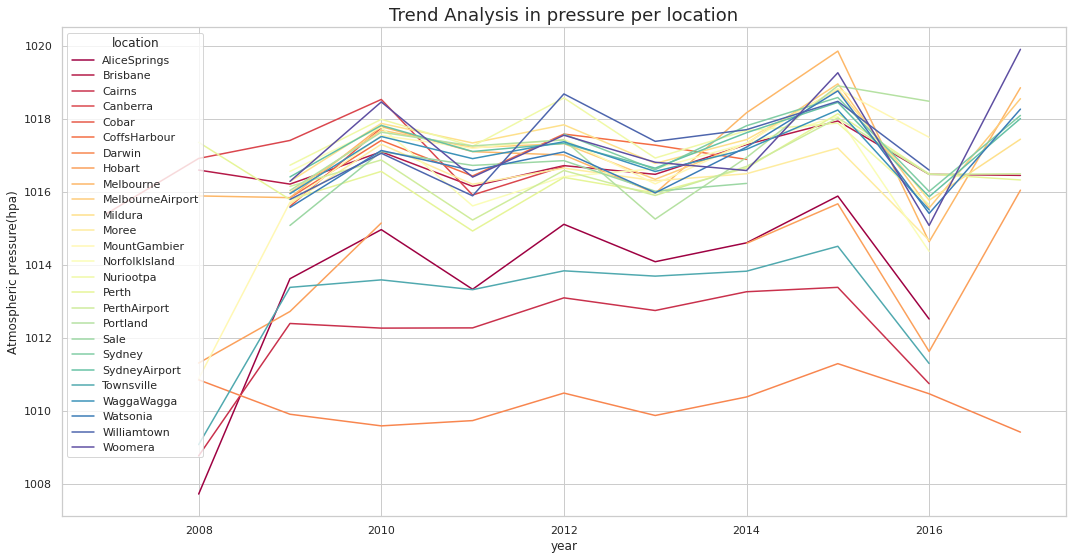

In [ ]:
# Line graph showing evolution of temperature over the years in different locations

by_year = (df_biv.groupby(['year', 'location']).avg_pressure.mean())
by_year.unstack().plot(kind='line', colormap= 'Spectral', figsize=(18, 9))
plt.ylabel('Atmospheric pressure(hpa)')
plt.title('Trend Analysis in pressure per location', fontsize=18)
plt.show()

Brisbane and Townsville are low pressure zones from the data

In [ ]:
df_biv.set_index('date', inplace=True)

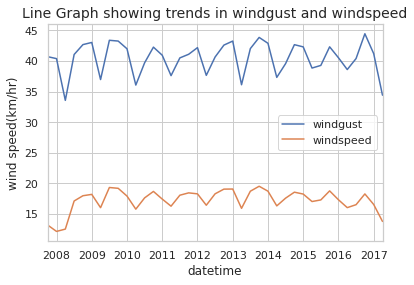

In [ ]:
#  Trend evolution over time in wind speed and wind gust

windgust= df_biv['windgustspeed'].resample('Q').mean()
windspeed= df_biv['avg_windspeed'].resample('Q').mean()

windgust.plot()
windspeed.plot()

plt.legend(['windgust', 'windspeed'])
plt.ylabel('wind speed(km/hr)', fontsize=12)
plt.xlabel('datetime', fontsize=12)
plt.title('Line Graph showing trends in windgust and windspeed', fontsize= 14)
plt.show()

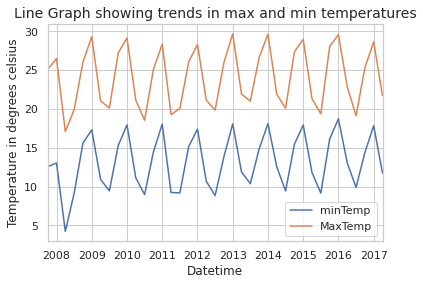

In [ ]:
#  Trend evolution over maximum and minimum temperatures

min= df_biv['mintemp'].resample('Q').mean()
max= df_biv['maxtemp'].resample('Q').mean()

min.plot()
max.plot()

plt.legend(['minTemp', 'MaxTemp'])
plt.ylabel('Temperature in degrees celsius', fontsize=12)
plt.xlabel('Datetime', fontsize=12)
plt.title('Line Graph showing trends in max and min temperatures', fontsize= 14)
plt.show()

#Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

## Drop unneccessary columns

In [ ]:
PCA_data=df_filled.drop(['date','avg_windspeed','avg_humidity','avg_pressure','avg_cloud','avg_temp'],axis=1)
PCA_data.head(2)

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,Cobar,21.4,37.5,0.0,14.3,6.9,NNE,43.0,ENE,NNE,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,No,Yes
1,Cobar,21.8,30.7,0.0,8.0,5.9,WNW,56.0,N,N,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,No,Yes


In [ ]:
#We start by checking variable types
PCA_data.dtypes

# next we change variable types.
PCA_data["location"] = PCA_data["location"].astype('category')
PCA_data["windgustdir"] = PCA_data["windgustdir"].astype('category')
PCA_data["winddir9am"] = PCA_data["winddir9am"].astype('category')
PCA_data["winddir3pm"] = PCA_data["winddir3pm"].astype('category')
PCA_data["raintoday"] = PCA_data["raintoday"].astype('category')
PCA_data["raintomorrow"] = PCA_data["raintomorrow"].astype('category')

#Next we encoded variable via the cat.codes accessor
PCA_data["location"] = PCA_data["location"].cat.codes
PCA_data["windgustdir"] = PCA_data["windgustdir"].cat.codes
PCA_data["winddir9am"] = PCA_data["winddir9am"].cat.codes
PCA_data["winddir3pm"] = PCA_data["winddir3pm"].cat.codes
PCA_data["raintoday"] = PCA_data["raintoday"].cat.codes
PCA_data["raintomorrow"] = PCA_data["raintomorrow"].cat.codes
PCA_data.head(2)

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,4,21.4,37.5,0.0,14.3,6.9,5,43.0,1,5,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,0,1
1,4,21.8,30.7,0.0,8.0,5.9,14,56.0,3,3,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,0,1


Distributing the dataset into two components X and Y

In [ ]:
#Set the values for x and y

x = PCA_data.drop('raintomorrow',1)
y = PCA_data['raintomorrow']

Splitting the dataset into the Training set and Test set

In [ ]:
# Splitting the X and Y into Training set and Testing set

from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

 Feature Scaling  by  fitting the data to a Standard scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Applying PCA function

In [ ]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
  
pca_rain = PCA(n_components =10)
  
x_train = pca_rain.fit_transform(x_train)
x_test = pca_rain.transform(x_test)
  


Explained_variance 


In [ ]:
explained_variance = pca_rain.explained_variance_ratio_
explained_variance 

array([0.28465326, 0.18173737, 0.11331374, 0.08045854, 0.06185265,
       0.04681376, 0.04488433, 0.03843945, 0.0269886 , 0.0225455 ])

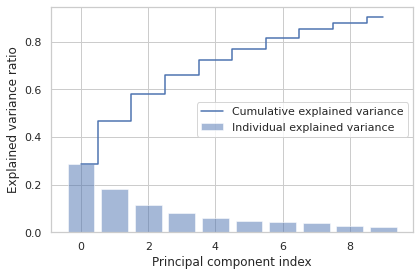

In [ ]:

# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = explained_variance
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The output shows that PC1, PC2 and PC3 prespectively account for approximately 28.4%,18.1% and 11.3% of the variance in the data set.

Eigendecomposition 

a)Eigenvectors 

In [ ]:
cov_mat = np.cov(x_train.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 1.00000000e+00  5.53849658e-16 -2.46544986e-17  4.02054999e-18
   8.50853213e-18 -8.82712143e-19 -1.81034964e-18  5.57754023e-18
   4.48342128e-18  3.14387857e-18]
 [ 0.00000000e+00  1.00000000e+00 -2.95563341e-16  7.04996847e-18
  -1.14152382e-18 -8.92231322e-18 -1.61338123e-17  2.26655256e-17
   2.60665352e-17  5.87157343e-18]
 [ 0.00000000e+00  2.52386759e-16  1.00000000e+00  5.51856543e-16
   1.72320227e-16  4.94818111e-19 -4.95596242e-17 -1.00800188e-16
   1.47068144e-16 -3.89551079e-17]
 [ 0.00000000e+00  3.08351786e-18  7.70997129e-16 -1.00000000e+00
   1.81102387e-15  3.72930930e-17  6.35353939e-17  2.92312702e-16
  -9.11544893e-16 -2.04802134e-16]
 [ 0.00000000e+00 -7.89271670e-18  6.81108292e-16 -1.78143980e-15
  -1.00000000e+00 -5.78068722e-16 -1.22811648e-16  8.12598939e-16
   3.87719736e-15  5.57295098e-16]
 [ 0.00000000e+00  9.57695215e-18  2.47714623e-16  7.00890750e-16
  -3.60218100e-15 -6.13282646e-17  3.71522107e-16  1.04661554e-15
  -1.00000000e+00 -


b) Eigenvalues

In [ ]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[5.97785025 3.81656904 2.37964096 1.68966654 1.29893438 0.47346584
 0.56677317 0.80724629 0.98311057 0.94259173]


Fitting Logistic Regression To the training set

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set result

In [ ]:
# Predicting the test set result using predict function under LogisticRegression 
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

Making the confusion matrix

In [ ]:
# making confusion matrix between test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
  
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test,y_pred))
# Accuracy 83%

[[8316  543]
 [1283 1192]]
Accuracy 0.8388918298923592


#Feature Importance

The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance)


In [ ]:
#Let’s find the most important features:

print(abs( pca_rain.components_ ))


[[6.18915348e-02 2.53295457e-01 3.72460419e-01 1.85591366e-01
  3.17819354e-01 2.61845224e-01 1.18803029e-01 5.58475565e-02
  1.22315888e-01 9.63208354e-02 4.87059122e-02 4.41811804e-02
  2.89819072e-01 2.50883760e-01 1.40635543e-01 1.82551613e-01
  1.85360833e-01 1.82701431e-01 3.30903622e-01 3.72145018e-01
  1.66441766e-01]
 [2.83081791e-02 2.83150240e-01 8.14089442e-02 2.90401715e-01
  7.72591942e-02 2.23410853e-01 7.34417397e-02 2.78340045e-01
  7.92576586e-02 5.88676088e-02 1.82703064e-01 2.29004885e-01
  9.48770974e-02 2.23731396e-01 3.85620910e-01 3.47505232e-01
  2.71840406e-01 2.65509664e-01 1.94138267e-01 5.70560051e-02
  2.82642035e-01]
 [1.54518749e-01 2.32897607e-01 1.44870652e-01 4.37038530e-02
  6.87092490e-02 1.74116206e-01 3.22023006e-01 3.94383782e-01
  1.73275475e-01 3.25144584e-01 3.46252496e-01 3.60774697e-01
  2.18218633e-01 2.26885043e-01 6.68868919e-02 2.24985144e-02
  1.76040746e-01 1.53856898e-01 1.91153066e-01 1.48113185e-01
  4.12581214e-02]
 [1.31049158e-01

Here, **pca_rain.components_** has shape **[n_components, n_features]** 

Thus, by looking at the PC1 (first Principal Component) which is the first row

 [6.18915348e-02 2.53295457e-01 ****3.72460419e-01**** 1.85591366e-01
 ****3.17819354e-01**** ****2.61845224e-01**** 1.18803029e-01 5.58475565e-02
  1.22315888e-01 9.63208354e-02 4.87059122e-02 4.41811804e-02
  ****2.89819072e-01**** ****2.50883760e-01**** 1.40635543e-01 1.82551613e-01
  1.85360833e-01 1.82701431e-01 ****3.30903622e-01**** ****3.72145018e-01****
  1.66441766e-01  ]
  We can conclude that feature **3, 5,6,13,14,19** and **20** are the most 
  important for PC1.

 # PROBABILITY ANALYSIS

In [ ]:
#probability it rains tomorrow
num_of_location__it_rains_tomorrow = (df_filled['raintomorrow'] == 'Yes').sum()
total_num_it_rains = len(df_filled)
prob_rains = num_of_location__it_rains_tomorrow/total_num_it_rains
print(prob_rains)


0.22059679895533713


In [ ]:
# Let us calculate the probability that it rains per location
rains_per_loc= df_filled.groupby('location')
num_of_days_it_rains_per_loc = rains_per_loc.size()
rains_per_loc_prob = num_of_days_it_rains_per_loc.apply(lambda num_of_days:num_of_days/total_num_it_rains )
print(rains_per_loc_prob)

location
AliceSprings        0.039298
Brisbane            0.052268
Cairns              0.043128
Canberra            0.019376
Cobar               0.009441
CoffsHarbour        0.024475
Darwin              0.054068
Hobart              0.034287
Melbourne           0.033546
MelbourneAirport    0.051845
Mildura             0.045880
Moree               0.033846
MountGambier        0.043516
NorfolkIsland       0.043534
Nuriootpa           0.035681
Perth               0.053592
PerthAirport        0.051421
Portland            0.034004
Sale                0.029999
Sydney              0.030140
SydneyAirport       0.050857
Townsville          0.042686
WaggaWagga          0.042634
Watsonia            0.048351
Williamtown         0.021211
Woomera             0.030916
dtype: float64


From the above analysis Moree leads in the probability of experiencing rainfall everyday compared to the other locations. 

In [ ]:
#Let us calculate the probability that it remains tomorrow if the min temparatures are above ten
mintemp_locs = df_filled[df_filled['mintemp']>=10]
mintemp_locs = len(mintemp_locs)
rainss = df_filled[df_filled['raintoday']=='Yes']
rainss_1=len(rainss)
prob_rains = rainss_1/mintemp_locs
print(prob_rains)

0.32842777835969417


In [ ]:
#Let us calculate the probability that it remains tomorrow if the min temparatures are above ten and it rains today
mintemp_locs = df_filled.loc[(df_filled['mintemp']<=3)&(df_filled['raintoday']=='Yes')]
mintemp_locs_1 = len(mintemp_locs)
rainss=df_filled[df_filled['mintemp']<=3]
rainss_1=len(rainss)
prob_rains = mintemp_locs_1/rainss_1
print(prob_rains)

0.0676


In [ ]:
#Let us calculate the probability that it remains tomorrow if the max temparatures are above ten
maxtemp_locs = df_filled.loc[(df_filled['maxtemp']<=10)&(df_filled['raintoday']=='Yes')]
maxtemp_locs_1 = len(maxtemp_locs)
rainss=df_filled[df_filled['mintemp']<=3]
rainss_1=len(rainss)
prob_rains = maxtemp_locs_1/rainss_1
print(prob_rains)

0.0356


In [ ]:
#Let us calculate the probability that it remains tomorrow if the humidity is above or equal to 8
Humidity = df_filled[df_filled['humidity9am']>=85]
Humid= len(Humidity)
rains_t = df_filled[df_filled['raintoday']=='Yes']
rains_t1=len(rains_t)
prob_rains = Humid/rains_t1
print(prob_rains)

0.7456546005421782


#####From the above result we can come into conclusion that it was more likely to experience rains on that day########
#####If the humidity was equal to or above 85

In [ ]:
#The probability that the humidity is above 85 at 9 am and it rains today
Humidity = df_filled[(df_filled['humidity9am']<=85) & (df_filled['raintoday']=='Yes')]
Humid= len(Humidity)
rains_t = len(df_filled)
prob_rains = Humid/rains_t
print(prob_rains)

0.13820607386754663


In [ ]:
#The probability that the pressure is equal to or above 1000 at 9 am or 3pm and it rains today
Humidity = df_filled[(df_filled['pressure9am']<=1000)&(df_filled['pressure3pm']<=1000) &(df_filled['raintoday']=='Yes')]
rains_t = df_filled[(df_filled['pressure9am']<=1000)&(df_filled['pressure3pm']<=1000)]
Humid_1= len(Humidity)
rains_t21=len(rains_t)
prob_rains_1 =Humid/rains_t21
print(prob_rains_1)

0.5966587112171837


From the above result we can see that the chances of rain falling are influenced by humidity. The higher the amount of humidity in a day the higher the chances of raining there are 

In [ ]:
#The probability that the pressure is equal to or above 1000 at 9 am or 3pm and it rains today
Humidity = df_filled[(df_filled['pressure9am']<=1000)&(df_filled['pressure3pm']<=1000) &(df_filled['raintoday']=='Yes')]
rains_t = df_filled[(df_filled['pressure9am']<=1000)&(df_filled['pressure3pm']<=1000)]
Humid= len(Humidity)
rains_t2=len(rains_t)
prob_rains = Humid/rains_t2
print(prob_rains)

0.5966587112171837


From the above analysis we figured out that the chances of raining increased as the pressure lowered. 

#  Hypothesis test

In [ ]:
#H0 Rain today and rain tomorrow  are independent
#Ha Rain today and rain tomorrow are dependent

In [113]:
dfnull = df_filled[(df_filled['raintoday'] == 'Yes')] 

In [123]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(dfnull['raintoday'], df_filled['raintomorrow']) 
contigency

raintomorrow,No,Yes
raintoday,,
Yes,973,789


In [124]:
contigency_pct = pd.crosstab(df_filled['raintomorrow'], dfnull['raintoday'], normalize='index')
contigency_pct

raintoday,Yes
raintomorrow,
No,1.0
Yes,1.0


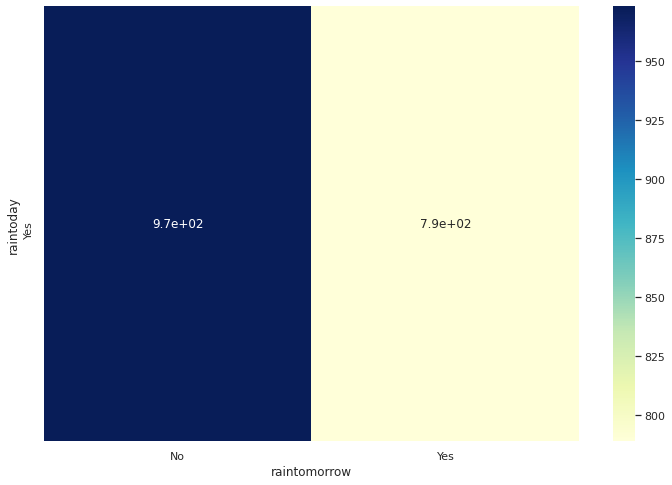

In [125]:

plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [126]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

1.0


In [ ]:
# the p value is 100%, thus we reject our null hypothesis. 
# Thus accepting the Ha, if it rains today and raining tomorrow are codependent

